# MAT2VCA Computer Lab 3

## Introduction

In this lab we will learn how to plot in 3 dimensions and simultaneously explore the directional derivative.


We will start by plotting surfaces that can be expressed as a function of $x$ and $y$ as $z=f(x,y)$.  Later in this subject we will look at other surfaces that are not functions of $x$ and $y$.  To plot these in a clean way, we will need to parametrize the surface, just like we had to learn how to parametrize a circle to plot it.



### Preliminary steps

To make images open in an interactive window, we use the following command.  (you will need to have matlab installed on the computer you are using and it will need to have the appropriate tools installed for jupyter notebook to use matlab).

You will see a figure show up "in line" and in a separate window.  The separate window will be interactive.

In [7]:
set(0,'DefaultFigureVisible','on');           % allow GUI windows

## Plotting Surfaces using `meshgrid` and `surf`

In this lab we will learn how to plot surfaces of the form $z = f(x,y)$.  Later we will adapt those tools to plotting surfaces that are not functions --- for example a sphere or some other shape where there may be multiple $z$ values for a given pair $(x,y)$.  For now though, we will focus on $z = f(x,y)$.

We'll look at an example first and then we will explore how the plot was created.



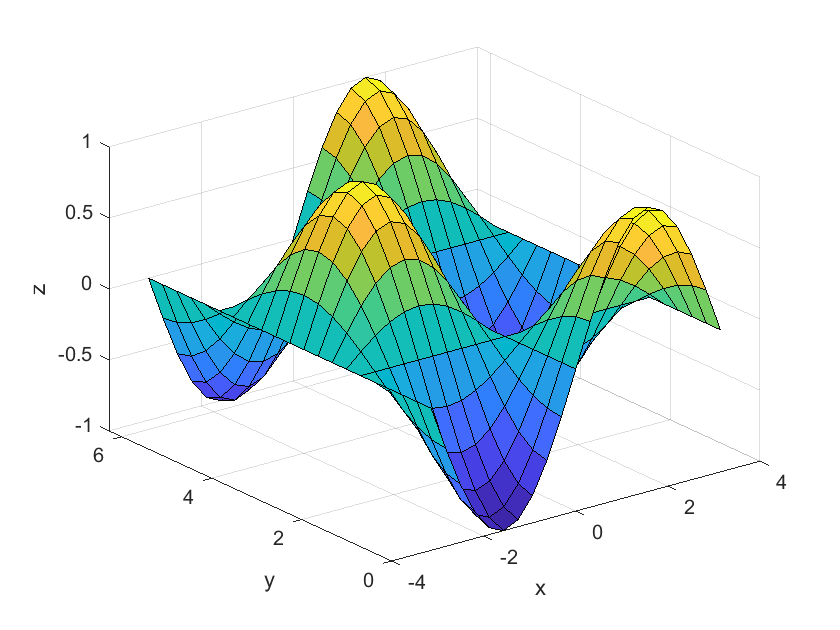

In [2]:
f = figure('Visible','on');                   % force a GUI figure
set(f,'Renderer','opengl');                   % interactive 3-D needs OpenGL

x = [-pi:pi/10:pi];
y = [0 : pi/10: 2*pi];

[X,Y] = meshgrid(x,y); %we'll explain this command later - it creates two matrices X and Y that relate to x and y.


Z = sin(X).*cos(Y);

surf(X,Y,Z)

xlabel('x')        %label axes.
ylabel('y')
zlabel('z')

Now we're going to try to understand what is going on with `meshgrid` and how `surf` works.  We're going to use this a lot this semester.

First so that we can look at all the variables, we'll shift to lower resolution and a smaller region of $x$ and $y$.  Here's the full set of commands.

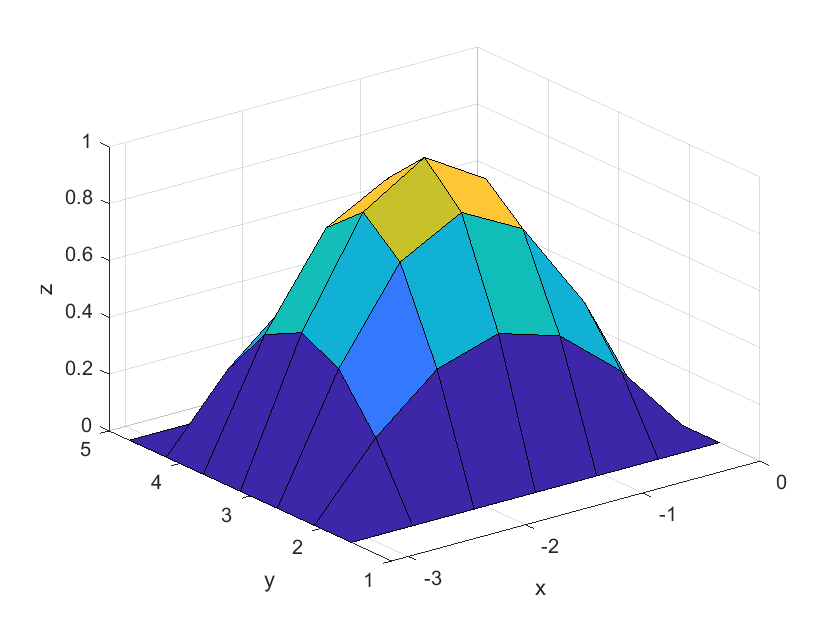

In [3]:
f = figure('Visible','on');                   % force a GUI figure
set(f,'Renderer','opengl');                   % interactive 3-D needs OpenGL

x = [-pi : pi/6 : 0];
y = [pi/2: pi/6: 3*pi/2];

[X,Y] = meshgrid(x,y); %we'll explain this command later - it creates two matrices X and Y that relate to x and y.


Z = sin(X).*cos(Y);

surf(X,Y,Z)

xlabel('x')        %label axes.
ylabel('y')
zlabel('z')

We can think of the plot as having a grid of $x_j$ and $y_i$ values, with the point $(x_j,y_i,f(x_j,y_i))$  joined to the points corresponding to the neighboring points of the grid. 


Let's go through the code step by step to see how this is done.

First we just do the commands:
`x = [-pi : pi/6 : 0]` and
`y = [pi/2: pi/6: 3*pi/2]`
These lay out the values of $x$ and $y$ for the grid.  Run the code below and verify that their values correspond to the grid observed in the plot above.

In [4]:
x = [-pi : pi/6 : 0]
y = [pi/2: pi/6: 3*pi/2]


x = 1x7 double
   -3.1416   -2.6180   -2.0944   -1.5708   -1.0472   -0.5236         0

y = 1x7 double
    1.5708    2.0944    2.6180    3.1416    3.6652    4.1888    4.7124

We're going to lay out a grid of points:

$$
\begin{pmatrix}
(-\pi, \pi/2) & (-5\pi/6, \pi/2) & (-2\pi/3, \pi/2) & (-\pi/2, \pi/2) & (-\pi/3, \pi/2) & (-\pi/6, \pi/2) & (0, \pi/2)\\
(-\pi, 2\pi/3) & (-5\pi/6, 2\pi/3) & (-2\pi/3, 2\pi/3) & (-\pi/2, 2\pi/3) & (-\pi/3, 2\pi/3) & (-\pi/6, 2\pi/3) & (0, 2\pi/3)\\
(-\pi, 5\pi/6) & (-5\pi/6, 5\pi/6) & (-2\pi/3, 5\pi/6) & (-\pi/2, 5\pi/6) & (-\pi/3, 5\pi/6) & (-\pi/6, 5\pi/6) & (0, 5\pi/6)\\
(-\pi, \pi) & (-5\pi/6, \pi) & (-2\pi/3, \pi) & (-\pi/2, \pi) & (-\pi/3, \pi) & (-\pi/6, \pi) & (0, \pi)\\
(-\pi, 7\pi/6) & (-5\pi/6, 7\pi/6) & (-2\pi/3, 7\pi/6) & (-\pi/2, 7\pi/6) & (-\pi/3, 7\pi/6) & (-\pi/6, 7\pi/6) & (0, 7\pi/6)\\
(-\pi, 4\pi/3) & (-5\pi/6, 4\pi/3) & (-2\pi/3, 4\pi/3) & (-\pi/2, 4\pi/3) & (-\pi/3, 4\pi/3) & (-\pi/6, 4\pi/3) & (0, 4\pi/3)\\
(-\pi, 3\pi/2) & (-5\pi/6, 3\pi/2) & (-2\pi/3, 3\pi/2) & (-\pi/2, 3\pi/2) & (-\pi/3, 3\pi/2) & (-\pi/6, 3\pi/2) & (0, 3\pi/2)
\end{pmatrix}
$$
So each row corresponds to a different value of $y$, going from the first value to the last in the order they appear in $y$.  Each column corresponds to a different value of $x$, again in the order they appear in $x$.

To do this, we will create two matrices: one matrix `X` whose values are the $x$ coordinates of the grid entries and another `Y` whose values are the $y$ coordinates:

$$
\begin{align*}
X &= \begin{pmatrix}
-\pi & -5\pi/6 & -2\pi/3 & -\pi/2 & -\pi/3 & -\pi/6 & 0\\
-\pi & -5\pi/6 & -2\pi/3 & -\pi/2 & -\pi/3 & -\pi/6 & 0\\
-\pi & -5\pi/6 & -2\pi/3 & -\pi/2 & -\pi/3 & -\pi/6 & 0\\
-\pi & -5\pi/6 & -2\pi/3 & -\pi/2 & -\pi/3 & -\pi/6 & 0\\
-\pi & -5\pi/6 & -2\pi/3 & -\pi/2 & -\pi/3 & -\pi/6 & 0\\
-\pi & -5\pi/6 & -2\pi/3 & -\pi/2 & -\pi/3 & -\pi/6 & 0\\
-\pi & -5\pi/6 & -2\pi/3 & -\pi/2 & -\pi/3 & -\pi/6 & 0
\end{pmatrix}\\
Y &=  \begin{pmatrix}
\pi/2  &    \pi/2 &   \pi/2 &   \pi/2 &   \pi/2 &   \pi/2 & \pi/2\\
2\pi/3 & 2\pi/3 & 2\pi/3 & 2\pi/3 & 2\pi/3 & 2\pi/3 & 2\pi/3\\
5\pi/6 & 5\pi/6 & 5\pi/6 & 5\pi/6 & 5\pi/6 & 5\pi/6 & 5\pi/6\\
\pi      &    \pi   &   \pi &   \pi &   \pi &   \pi & \pi\\
7\pi/6 & 7\pi/6 & 7\pi/6 & 7\pi/6 & 7\pi/6 & 7\pi/6 & 7\pi/6\\
4\pi/3 & 4\pi/3 & 4\pi/3 & 4\pi/3 & 4\pi/3 & 4\pi/3 & 4\pi/3\\
3\pi/2 &  3\pi/2 & 3\pi/2 &   3\pi/2 &   3\pi/2 &   3\pi/2 & 3\pi/2
\end{pmatrix}
\end{align*}
$$

These matrices are created by

`[X,Y] = meshgrid(x,y)`.  

In [3]:
x = [-pi : pi/6 : 0];
y = [pi/2: pi/6: 3*pi/2];  %output suppressed so we can focus on next command

[X,Y] = meshgrid(x,y)

X = 7x7 double
   -3.1416   -2.6180   -2.0944   -1.5708   -1.0472   -0.5236         0
   -3.1416   -2.6180   -2.0944   -1.5708   -1.0472   -0.5236         0
   -3.1416   -2.6180   -2.0944   -1.5708   -1.0472   -0.5236         0
   -3.1416   -2.6180   -2.0944   -1.5708   -1.0472   -0.5236         0
   -3.1416   -2.6180   -2.0944   -1.5708   -1.0472   -0.5236         0
   -3.1416   -2.6180   -2.0944   -1.5708   -1.0472   -0.5236         0
   -3.1416   -2.6180   -2.0944   -1.5708   -1.0472   -0.5236         0

Y = 7x7 double
    1.5708    1.5708    1.5708    1.5708    1.5708    1.5708    1.5708
    2.0944    2.0944    2.0944    2.0944    2.0944    2.0944    2.0944
    2.6180    2.6180    2.6180    2.6180    2.6180    2.6180    2.6180
    3.1416    3.1416    3.1416    3.1416    3.1416    3.1416    3.1416
    3.6652    3.6652    3.6652    3.6652    3.6652    3.6652    3.6652
    4.1888    4.1888    4.1888    4.1888    4.1888    4.1888    4.1888
    4.7124    4.7124    4.7124    4.7124    4.7124    4.7124    4.7124

Now we calculate $z = \sin(x)\cos(y)$.  When we use the command

`Z = \sin(X) .* \cos(Y)`

the two input matrices $X$ and $Y$ are $7\times 7$ matrices.  The $(i,j)$ entry of `Z` will be found by taking $\sin(\cdot)$ of the $j$'th entry of $x$ and multiplying by $\cos(\cdot)$ of the $i$-th entry of $y$.

So in the $(i,j)$ entry of `Z`,  corresponding to a given $(x_j, y_i)$ we get $\sin(X)\cos(Y)$.

In the cell below we create Z.  We also display  `Z(2,3)`, `x(3)`, and `y(2)`.  We show that `sin(x(3))*cos(y(2))` matches `Z(2,3)`.  Finally we print out  `X(2,3)` and `Y(2,3)` to verify that they match `x(3)` and `y(2)`. 

In [6]:
x = [-pi : pi/6 : 0];
y = [pi/2: pi/6: 3*pi/2];

[X,Y] = meshgrid(x,y); %we'll explain this command later - it creates two matrices X and Y that relate to x and y.


Z = sin(X).*cos(Y)

fprintf('Z(2,3) = %f.  Check that this matches the answer in the matrix printed above.\n', Z(2,3) )  
     %the '%f' is a placeholder for a float (a non-integer number) which is given after the string is over.
     % the '\n' is an instruction to start a new line after printing this.  Otherwise the next line would appear on the same line
fprintf('x(3)= %f and y(2) =%f \n', x(3), y(2))
fprintf('e^(-(x(3)^2+y(2)^2) = %f\n', sin(x(3))*cos(y(2)))
fprintf('X(2,3) = %f and Y(2,3) = %f.  These match x(3) and y(2) above\n', X(2,3), Y(2,3))


Z =

  -0.0000  -0.0000  -0.0000  -0.0000  -0.0000  -0.0000        0
   0.0000   0.2500   0.4330   0.5000   0.4330   0.2500        0
   0.0000   0.4330   0.7500   0.8660   0.7500   0.4330        0
   0.0000   0.5000   0.8660   1.0000   0.8660   0.5000        0
   0.0000   0.4330   0.7500   0.8660   0.7500   0.4330        0
   0.0000   0.2500   0.4330   0.5000   0.4330   0.2500        0
   0.0000   0.0000   0.0000   0.0000   0.0000   0.0000        0



Z(2,3) = 0.433013.  Check that this matches the answer in the matrix printed above.


x(3)= -2.094395 and y(2) =2.094395 


e^(-(x(3)^2+y(2)^2) = 0.433013


X(2,3) = -2.094395 and Y(2,3) = 2.094395.  These match x(3) and y(2) above


We finally plot this using `surf`.  

It will take 
- the $(i,j)$ entry of `X`  (which is $x_j$) for the $x$ coordinate, 
- the $(i,j)$ entry of `Y` (which is $y_i$) for the $y$ coordinate, and
- the $(i,j)$ entry of `Z` (which is $\sin(x_j)\cos(y_i)$) for the $z$ coordinate.  

It will use a straight line to connect the point corresponding to an $xy$ grid value with the points corresponding to adjacent grid values.  This produces many small quadrilateral cells whose boundaries are the lines connecting adjacent grid values.

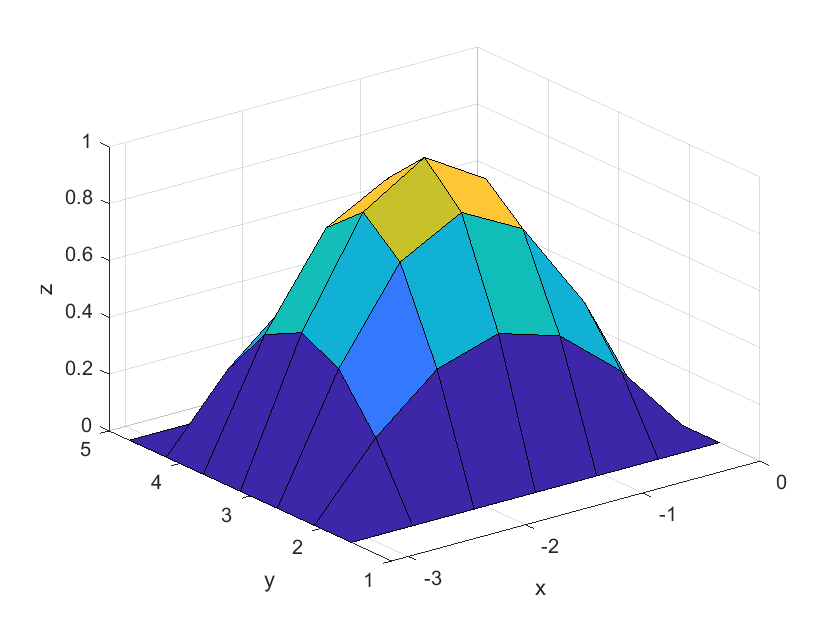

In [5]:
f = figure('Visible','on');                   % force a GUI figure
set(f,'Renderer','opengl');                   % interactive 3-D needs OpenGL

x = [-pi : pi/6 : 0];
y = [pi/2: pi/6: 3*pi/2];


[X,Y] = meshgrid(x,y); 


Z = sin(X).*cos(Y);

surf(X,Y,Z)

xlabel('x')        %label axes.
ylabel('y')
zlabel('z')

You can think of `surf` as a function that plots these curves and then colors in the little 'rectangles' that they form.

Make sure you understand the plot above before continuing.  This is particularly important for understanding the extension question, which introduces the approach we'll use later in the subject to draw more complex surfaces that can't be written as $z=f(x,y)$.



### Self test

plot the surface corresponding to the function $z = e^{-(x^2+y^2)}$ in the rectangle $x \in [-2,2]$ and $y \in [-2,2]$.

Note that you will need to use the syntax `e.^(-(X.^2+Y.^2))`  with a dot immediately after `e`, or you can use `exp(-(X.^2+Y.^2))`.

# Tangent plane

Now we're going to plot a tangent plane at the point $(x_0,y_0) = (-5\pi/8, 3\pi/4)$


In the $x$ direction, the plane has a slope of $\partial f/\partial x = \cos(x)\cos(y) = \cos(-5\pi/8)\cos(3\pi/4)$.  

In the $y$ direction, it is $\partial f/\partial y = -\sin(x)\sin(y) = -\sin(-5\pi/8)\sin(3\pi/4)$.


The tangent plane is $T(x,y) = f(x_0,y_0) + (x-x_0)*\frac{df}{dx}(x_0,y_0) + (y-y_0)*\frac{df}{dy}(x_0,y_0)$


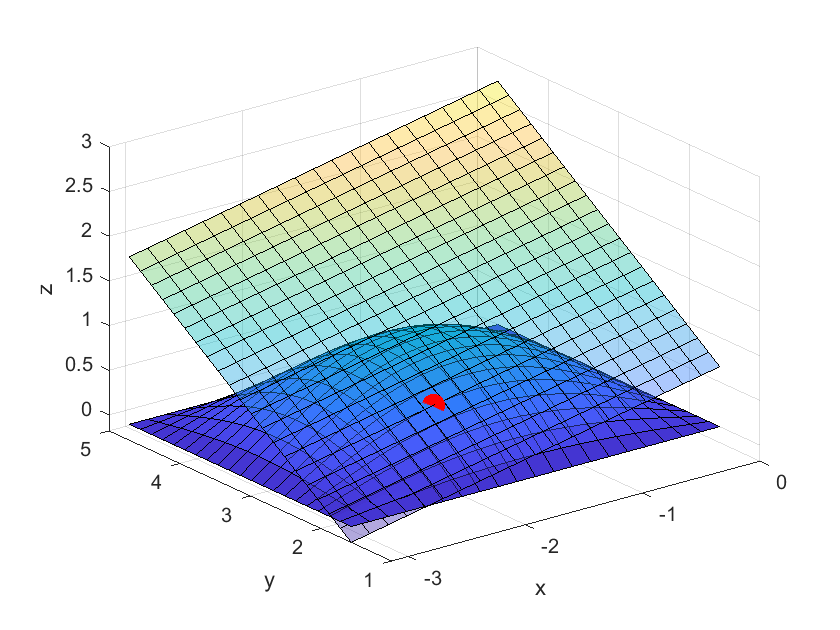

x0 = -1.9635

y0 = 2.3562

z0 = 0.6533

dfdx = 0.2706

dfdy = 0.6533

In [6]:
f = figure('Visible','on');                   % force a GUI figure
set(f,'Renderer','opengl');                   % interactive 3-D needs OpenGL


x0 = -5*pi/8
y0 = 3*pi/4
z0 = sin(x0)*cos(y0)

dfdx = cos(-5*pi/8)*cos(3*pi/4)
dfdy = -sin(-5*pi/8)*sin(3*pi/4)

x = [-pi:pi/20:0];
y = [pi/2 : pi/20: 3*pi/2];

[X,Y] = meshgrid(x,y); %we'll explain this command later - it creates two matrices X and Y that relate to x and y.


T = z0 + (X-x0)*dfdx + (Y-y0)*dfdy;
Z = sin(X).*cos(Y);

surf(X,Y,Z)

hold on

surf(X,Y,T, 'FaceAlpha', 0.4)

plot3(x0,y0,z0, 'r.', 'MarkerSize', 40)
xlabel('x')        %label axes.
ylabel('y')
zlabel('z')



Use the figure in the external window to verify that the plane really is tangent to the surface.

## Self test

Take the plot of $e^{-(x^2+y^2)}$ from the earlier self-test and plot it again.  Choose a point $(x_0,y_0)$ and plot the tangent plane at that point.

This is not intended to be an exercise in copying and pasting without needing to engage your brain.  Make sure you understand what the commands are doing.

